<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 2: Behavioral Finance </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_02_KVGH.git'>Link</a></font>

______

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Este laboratorio tiene como propósito particular el elaborar herramientas para el análisis del desempeño de la actividad de trading, desde el punto de vista de la cuenta y desde el punto de vista de la persona que opera la cuenta (trader). Por lo tanto, este laboratorio estará dividido en 4 partes, cada una, servirá para cumplir con la estructura básica de proyectos para sistemas de trading y las otras 3 partes son relacionadas cada una a los propósitos del módulo completo. </p>

______

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Estructura </span></div>

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte I </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En la primera parte de este laboratorio, se definió la estructura básica de la forma en la que se trabajaría para abordar tal problemática, la cual, en términos generales, se define como:  </p>

- _La evaluación de un trader a través de su información histórica de operaciones en la cuenta que este mismo está a cargo, adhiriendo aspectos de behavioural finance._

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El repositorio se constituye de la siguiente manera: </p>

| Elemento | Tipo | Contenido |
| :---:   | :-: | :-: |
| archivos | carpeta | Archivos con precios históricos |
| datos.py | Script de Python 3 | Variables y datos relevantes |
| funciones.py | Script de Python 3 | Funciones para procesamiento de datos |
| visualizaciones.py | Script de Python 3 | Funciones para visualización de datos |
| principal.py | Script de Python 3 | Ejecutar secuencialmente el proyecto completo |
| LAB_02.ipynb | Jupyter Notebook | Explicaciones del proyecto |
| README.md | Archivo de Markdown | Información basica del proyecto |

_______________

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.0em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan las operaciones de una cuenta de OANDA </p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import visualizaciones as vs                        # Para visualizacion de datos

11.960974216461182


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte II </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo de esta parte es realizar mediciones de estadísticas básicas de una cuenta de trading. Para efectuar esto, es necesario empezar con el primer paso, el cual basicamente consiste en leer el archivo en excel que se encuentra en la carpeta de archivos, este mismo previamente se tuvo que descargar de la cuenta de trading de OANDA.</p>

In [2]:
# Leer archivo (Se tienen 2 en 'archivos')
data = fn.f_leer_archivo('archivo_tradeview_1.xlsx')
data.head()

,order,opentime,type,size,symbol,openprice,s/l,t/p,closetime,closeprice,commission,taxes,swap,profit
0,233141811,2020.02.11 04:01:05,buy,0.05,usddkk,6.84715,6.84295,6.85115,2020.02.11 08:15:15,6.84905,0,0,0,1.39
1,233156163,2020.02.11 04:01:05,buy,0.05,usddkk,6.84715,6.84295,6.85115,2020.02.11 09:18:47,6.85115,0,0,0,2.92
2,233259147,2020.02.12 03:46:15,buy,0.10,usddkk,6.84360,6.84080,6.84630,2020.02.12 06:33:45,6.84630,0,0,0,3.94
3,233141532,2020.02.11 03:58:21,buy,0.05,usdjpy,109.85200,109.65200,110.10200,2020.02.12 10:44:08,110.10500,0,0,0,11.49
4,233141473,2020.02.11 03:54:44,buy,0.10,eurusd,1.09155,1.08856,1.09406,2020.02.12 17:54:18,1.08856,0,0,0,-29.90


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Como se observa, la función 'f_leer_archivo' requiere el nombre del archivo para indicarle cual es el archivo de excel que contiene las operaciones históricas del trader, el path . Otro punto a destacar es que, debido a la manera en que está programada tal función, es necesario que el nombre de la hoja sea 'Hoja1' así como contener las siguientes columnas:</p>

|    |  |  |    |  |  |    |  |  |
| :-:   | :-: | :-: | :-:   | :-: | :-: | :-:   | :-: | :-: |
|I   Order  I |  Size  I  |  Openprice  I|  S/L  I  |  T/P  I  |  Closeprice  I|  Taxes  I  |  Swap  I  | Profit  I|


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Ya que la función se cerciora que estas columnas sean de tipo numérico debido a que estos datos son de suma importancia para el resto del proyecto.</p>


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A partir de esto, se le agrega columnas a 'data'. Una donde, con 'f_columna_tiempo', se calcula el tiempo en segundos de lo que duro cada operación abierta, es decir restando el closetime y el opentime. Una segunda columna que se le agrega es la de pips, a traves de la función 'f_columna_pips' cuya función tambien agrega otras dos columnas que son la de pips acumulado y el profit acumulado. Asimismo, a parte de estas columnas agregadas al archivo que ahora se encuentra en un objeto tipo DataFrame (data), tambien se calculan ciertas estadisticas básicas con la funcion de 'f_estadistica_ba' cuyas salidas son 2, la primera siendo df_1_tabla que es un DataFrame con tales calculos, y df_2_ranking que basicamente es el ranking de los instrumentos utilizados por el trader que fueron ganadoras. </p>

In [3]:
# Agregar la columna de los tiempos
fn.f_columna_tiempos(data)

# Agregar columna de pips
fn.f_columna_pips(data)

# DataFrames de Estadisticas basicas y ranking
df_estadistic = fn.f_estadistica_ba(data)
df_1_tabla = df_estadistic['estadisticas']
df_1_tabla

,Valor,Descripcion
Ops totales,20,Operaciones totales
Ganadoras,13,Operaciones ganadoras
Ganadoras_c,9,Operaciones ganadoras de compra
Ganadoras_v,4,Operaciones ganadoras de venta
Perdedoras,7,Operaciones perdedoras
Perdedoras_c,4,Operaciones perdedoras de compra
Perdedoras_v,3,Operaciones perdedoras de venta
Media (Profit),2.02,Mediana de profit de las operaciones
Media (Pips),12.4,Mediana de pips de las operaciones
r_efectividad,0.65,Ganadoras Totales/Operaciones Totales


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En el anterior DataDrame llamado df_1_tabla, es poible observar el nombre de cada calculo en el indice, así como el valor de cada calculo en la columna 0 y su descripcion en la 1. En el archivo 'archivo_tradeview_1.xlsx' se tienen 20 operaciones (las cuales son parte del Laboratorio 1, en donde se hizo trading manual) De estas, 13 tuvieron un profit positivo, y 7 perdedoras. A su vez también están las operaciones que fueron de compra o venta</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px">    A continuacion se muestra el ranking en donde se muestra que, de todas las operaciones hechas de tal instrumento, saber el porcentaje de las que tuvieron un resultado positivo (profit > 0)</p>

In [4]:
# DataFrame del ranking
df_2_ranking = df_estadistic['ranking']
df_2_ranking

,ranking
usddkk,1.0
usdjpy,1.0
usdsgd,1.0
usdcnh,1.0
eurusd,0.5
usdcad,0.5
eurjpy,0.0
usdmxn,0.0
audusd,0.0


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Graficamente se visualiza de la siguiente manera el ranking</p>

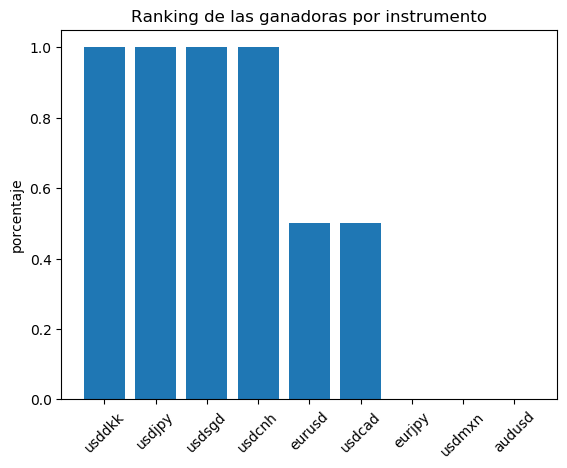

In [5]:
# Grafica de barras del ranking
vs.fig_rank

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Sin embargo, al ser un ranking del porcentaje de operaciones ganadores que se ejecutaron por operación, no se puede observar la importancia en cuanto al profit de la cuenta tuvo cada instrumento; debido a esto se calcula otro ranking donde se pueda observar un poco más este efecto </p>

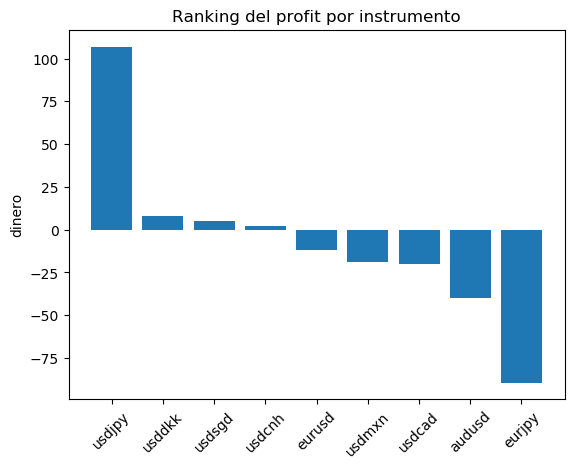

In [6]:
# Grafica de barras del ranking
vs.fig_rank2

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Como se puede observar, esas que tienen 0% de operaciones ganadoras, tuvieron, obviamente un profit negativo. Pero no sólo eso, además que en algunos instrumentos donde se tiene 100% de ganadaros, no tienen un profit tan alto (lo más probable es que debido a que sólo son 20 operaciones, entonces si se hizo una operación del instrumento 'usdsgd' y se ganó 4.9 dólares cuenta como 100% ganadora, porque lo es, sin embargo no hace tanta diferencia como aquella que pierde 89.28)</p>

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte III </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo de esta tercera parte es calcular Medidas de Atribución al Desempeño expresadas semanalmente de la cuenta de trading y de la actividad del trader como persona. Se empieza calculando el capital acumulado a partir del capital inicial que se encuentra en el archivo datos.py en este caso es de $5,000 e ir sumando el profit y así tener esta nueva columna que muestra la evolución del capital de la cuenta a través del tiempo por operación acomodada por closetime. Después de calcular esto con la función de 'f_columna_capital_acm' sigue generar un dataFrame donde se suma el profit (rendimiento) de todas las operaciones por día, es decir, si se cerraron 3 operaciones en un mismo día, sumar el profit de esas 3 operaciones para saber el rendimiento de tal día, y así por día dejando en 0 los días en los que no se hicieron operaciones. De esta manera, en df_profit se encuentra la columna del día, o sea timestamp, el rendimiento diario cuya columna se llama profit_d, otra columna del profit acumulado para ver el rendimiento acumulado. Después con la función de 'log_dailiy_rends' de la columna de profit_acm ya que se necesitará para futuros cálculos.
</p>

In [7]:
# Agregar capital acumulado
fn.f_columna_capital_acm(data)

# DataFrame de profits
df_profit = fn.f_profit_diario(data)

# Agregar rendimientos del profit acumulado
fn.log_dailiy_rends(df_profit, 'profit_acm')

df_profit.head()

,timestamp,profit_d,profit_acm,rends
0,2020-02-11,4.31,5004.31,NaN
1,2020-02-12,-14.47,4989.84,-0.002896
2,2020-02-13,-58.56,4931.28,-0.011805
3,2020-02-14,-1.15,4930.13,-0.000233
4,2020-02-16,0.00,4930.13,0.000000


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A partir de tener este nuevo DataFrame 'df_profit', se calculan las medidas de atribución al desempeño con la columa de rends. </p>

In [8]:
# Estadisticas de metricas de desempeño
df_profit_estad = fn.f_estadisticas_mad(data)
df_profit_estad

,values
Sharpe,-0.201464
Sortino_c,-0.385853
Sortino_v,-0.821399
Drawdown_capi,-88.01 | 2020-02-11 | 2020-02-18
Drawup_capi,71.41 | 2020-02-18 | 2020-02-19
Information,0.330982


In [9]:
# Promedio de los rendimientos de la cuenta
df_profit['rends'].mean()

-0.0009558647536383523

In [10]:
# Volatilidad de la cuenta
df_profit['rends'].std()

0.005847641967409328

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El capital tuvo una evolución como se puede observar en la siguiente grafica (ésta es por operación, más adelante se encuentra la gráfica de la evolución diaria), y debido a que la cuenta tiene un promedio (de los rendimientos) negativo, en consecuencia, las medidas de atribución son negativas. Esto nos quiere decir que es mejor invertir en cetes (la tasa libre riesgo se encuentra en el archivo de datos.py, ahí se puede modificar 'rf') y en el bechmark (también se especifica en dicho archivo). El periodo en que la cuenta estuvo activa fue 2 semanas y no hay muchas operaciones.</p>

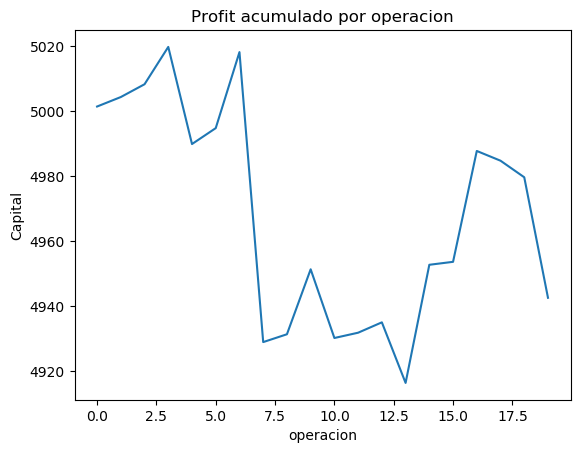

In [11]:
# Grafica de profit acumukado por operacion
vs.fig_cap

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se encuentran las definiciones de dichos calculos de las medidas de atribución.</p>

<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px"> Sharpe: </p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Mide el rendimiento promedio excedente sobre la tasa libre de riesgo por unidad de riesgo incurrido. Es decir, es un indicativo del rendimiento esperado del trader por encima de la tasa libre de riesgo descontando el riesgo en el que incurre.  Mientras sea mas alto el valor del ratio, significa que el numerador fue muy grande o que el denominador fue muy pequeño. Esto, en terminos financieros, podría interpretarse que un Sharpe es alto cuando se tiene un rendimiento excedente despues de la tasa libre de riesgo alto, y/o, que la volatilidad de los rendimientos de la estrategia de trading fue baja. Otra manera más simple de pensarlo es que el trader hizo mucho más rendimiento que el riesgo en el que incurre.</p>


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px">Sortino Ratio:</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Derivado del Sharpe Ratio, el Sortio Ratio es una medida que incorpora 2 conceptos especiales: 1) el MAR o "Minimum Acceptable Return" (algunos fondos y profesionales se refieren a esto como DTR o Desired Target Return) y es el rendimiento promedio objetivo que se desea obtener del trader. 2) el TDD o "Target Downside Deviation" se calcula con los rendimientos por periodo que estén por debajo del MAR, es decir, TDD es la volatilidad de los rendimientos por debajo del rendimiento objetivo.</p> 


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px">Drawdown / DrawUp:</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> La minusvalía/plusvalía máxima que se presentó en la evolución del capital. Esta medida puede ser calculada, tanto para información temporalmente medida en los mismos intervalos o equidistante (ej. rendimientos diarios) y también para información obtenida en intervalos distintos o no equidistante (ej: rendimiento por operación). Esto es posible ya que lo que se busca obtener de información es la fecha inicial, la fecha final y la magnitud del periodo donde la acumulación de pérdida/ganancia de capital resultó ser la mayor dentro del periodo de tiempo analizado.</p>


<p style = "font-family: Calibri Light; font-size:1.4em;color:#50C8C4; LINE-HEIGHT:25px">Information Ratio:</p>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Es una medida similar al Sharpe, con la diferencia de incorporar información del benchmark. En el cálculo de esta medida se reemplaza en el numerador la tasa libre de riesgo por el rendimiento del benchmark y en el denominador se utiliza la información de todos los rendimientos de la estrategia de trading una vez que se descuentan los rendimientos del benchmark. De tal manera que, al descontar la información del mercado para el rendimiento (numerador) como para la medida de riesgo (numerador) se está buscando tener una medida de la "información" extra que el trader tiene/genera o que logra capturar de comportamiento de los activos y que podría hacer que sus cifras sean mejores que las de un benchmark.</p>

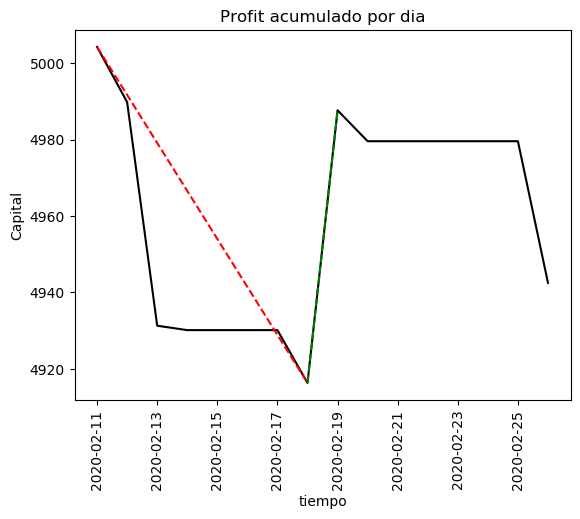

In [12]:
# Grafica de profit acumukado por dia
vs.fig_dd

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Lo que se puede observar en esta grafica es profit diario de la cuenta, así como el drawdown y el drawup </p>

> <span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Parte IV </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo de esta cuarta y ultima parte es proponer, diseñar y calcular una función para obtener evidencia sobre la presencia de sesgos cognitivos en un trader.</p>

.

<span style="color:#AABCBB; font-family:Georgia; font-size:1.4em;"> Disposition Effect </span>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Este sesgo cognitivo propuesto por los autores Kahneman y Tversky, para el caso de trading, aplica como el efecto que se puede observar en el histórico de un trader sobre el hecho que tiende a cortar las ganancias rápido y mantener las pérdidas mucho tiempo, es decir, a materializar las ganancias mas frecuentemente que las pérdidas.</p>

In [13]:
# Operaciones ganadora vs perdedora (ocurrencia)
sesgos = fn.f_sesgos_cognitivo(data)

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Lo que hace la funcion de 'f_sesgos_cognitivo' es lo siguiente: primero busca las operaciones ganadoras (profit > 0) y a partir de tenerlas se hace una búsqueda por cada operación ganadora para encontrar las operaciones que estaban abiertas en el momento de cierre de cada operación ganadora. Al tener esto, se descarga el precio de la operación abierta (ya que no se tiene en la data frame de los datos, solo se cuenta con el precio de apertura y el de cierre, este precio es uno intermedio al momento del cierre de la ganadora (que es donde te sitúas en el tiempo). A partir de esto, buscas cual tenía una perdida flotante (de las operaciones abiertas al momento que la ganadora se cerró) esto es, si el precio intermedio (en close de la ganadora) es menor al precio de apertura (siempre y cuando la operación sea de tipo compra) o viceversa si es venta. Cuando se tienen todas las operaciones abiertas para cada ganadora, se toma la de mayor perdida flotante ya que sólo se comparan dos operaciones (una ganadora y una perdedora) a ésta comparación la llamamos 'ocurrencia'. En el diccionario que entrega 'sesgos', tiene una llave que se llama 'ocurrencias', la cual es un diccionario con todaslas ocurrencias así como información relevante de tal. </p>

In [14]:
ocurrencias = fn.dataframe_ocurrencias(sesgos['ocurrencias'])
ocurrencias

,CloseTime,Capital_acm,Ganadora,Gan_Profit,Gan/Cap_acm,Perdedora,Perdida_flotante,Perd/Cap_acm,Perd_Tot,Ratio_cp/cg
0,2020-02-11 08:15:15,5001.39,usddkk,1.39,0.028,eurusd,-14.1,0.282,-29.9,10.144
1,2020-02-11 09:18:47,5004.31,usddkk,2.92,0.058,eurusd,-3.2,0.064,-29.9,1.096
2,2020-02-12 06:33:45,5008.25,usddkk,3.94,0.079,usdsgd,-1.946,0.039,4.9,0.494
3,2020-02-12 10:44:08,5019.74,usdjpy,11.49,0.229,eurusd,-22,0.438,-29.9,1.915
4,2020-02-13 02:29:21,4994.74,usdsgd,4.9,0.098,eurjpy,-29.448,0.59,-89.28,6.01
5,2020-02-13 03:50:04,5018.15,usdjpy,23.41,0.467,eurjpy,-17.178,0.342,-89.28,0.734
6,2020-02-14 02:13:32,4951.28,eurusd,20,0.404,usdcad,-1.058,0.021,-21.15,0.053
7,2020-02-18 02:11:47,4931.76,usdjpy,1.63,0.033,usdmxn,-27.57,0.559,-18.65,16.914
8,2020-02-18 09:14:03,4934.95,eurusd,3.19,0.065,usdmxn,-45.266,0.917,-18.65,14.19


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> La función 'dataframe_ocurrencias' unicamente es para cambiar la forma de visualizarlo, en vez de un diccionario, un dataframe donde cada row es una ocurrencia. Se sabe que de las 20 operaciones, 13 son ganadoras. Pero al momento de cierre de estas 13, en 9 de estas mismas hubo tal ocurrencia. Es decir, estaba abierta al menos otra operación la cual tenia una perdida flotante. La explicacion de las columnas es la siguiente: 'CloseTime' es la fecha y hora donde nos situamos (el cierre de la ganadora). 'Capital_acm' es el capital acumulado que se lleva en CloseTime. 'Ganadora' indica el instrumento de la operación ganadora. 'Gan_Profit' es el profit que se obtuvo en tal momento de la operación ganadora. 'Gan/Cap_acm' es la division de las columnas 'Gan_Profit'/'Capital_acm'. 'Perdedora' es el instrumento de la operacion perdedora. 'Perdida_flotante' es lo que se hubiese perdido de cerrar esa operación al mismo tiempo que se cerro la ganadora. 'Perd/Cap_acm' es la division de las columnas 'Perd_Profit'/'Capital_acm'. 'Ratio cp/cg' es el profit de la ganadora entre la perdida flotante.</p>

In [15]:
sesgos['resultados']

,Valor
ocurrencias,9
status_quo,0.333333
aversion_perdida,0.555556
sensibilidad_decreciente,no


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> Finalmente los resultados, como se observan son: Ocurrencias, que pues es literal el número de ocurrencias. Status_quo el cual es el porcentaje de ocurrencias donde capital_perdedora/capital_acm < capital_ganadora/capital_acm. Aversion perdida es el porce </p>